In [104]:
Data Analytics!!

Principle of Analytics


SyntaxError: invalid syntax (614022429.py, line 1)

Importing code , review them , clean if necessary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading Data from 

In [ ]:
df=pd.read_csv('News_Final.csv')


In [ ]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [ ]:
checking for null values

SyntaxError: invalid syntax (4260025534.py, line 1)

In [ ]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [ ]:
df.head()
df.shape

(92945, 11)

In [ ]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


Check for duplicate values

In [ ]:
df.duplicated().sum()


np.int64(1)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

Filtering unique values in Topics

In [ ]:
print(df['Topic'].unique())



['obama' 'economy' 'microsoft' 'palestine']


Identifying Outliers in the dataset

In [ ]:
Q1 = df['SentimentHeadline'].quantile(0.25)
Q3 = df['SentimentHeadline'].quantile(0.75)
IQR = Q3 - Q1
df[(df['SentimentHeadline'] < Q1 - 1.5 * IQR) | (df['SentimentHeadline'] > Q3 + 1.5 * IQR)]
df[(df['SentimentHeadline'] < Q1 - 1.5 * IQR) | (df['SentimentHeadline'] > Q3 + 1.5 * IQR)].count()




IDLink               1955
Title                1955
Headline             1955
Source               1955
Topic                1955
PublishDate          1955
SentimentTitle       1955
SentimentHeadline    1955
Facebook             1955
GooglePlus           1955
LinkedIn             1955
dtype: int64

In [ ]:
Removing outliers usinf IQR method

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['SentimentHeadline'].quantile(0.25)
Q3 = df['SentimentHeadline'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers (keep only non-outliers)
df_clean = df[(df['SentimentHeadline'] >= lower_bound) & (df['SentimentHeadline'] <= upper_bound)]

# Optional: Replace original DataFrame
df = df_clean

# Show cleaned data
print(df)


         IDLink                                              Title  \
0       99248.0   Obama Lays Wreath at Arlington National Cemetery   
1       10423.0        A Look at the Health of the Chinese Economy   
2       18828.0   Nouriel Roubini: Global Economy Not Back to 2008   
3       27788.0                          Finland GDP Expands In Q4   
4       27789.0  Tourism, govt spending buoys Thai economy in J...   
...         ...                                                ...   
93234   61851.0  Stocks rise as investors key in on US economy ...   
93235   61865.0  Russian PM proposes to use conservative and to...   
93236  104793.0  Palestinian Government Uses Foreign Aid To Pay...   
93237  104794.0  Palestine Youth Orchestra prepares for first U...   
93238   61870.0  Sausalito businesswoman wins $10000 in Microso...   

                                                Headline  \
0      Obama Lays Wreath at Arlington National Cemete...   
1      Tim Haywood, investment director

In [ ]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [ ]:
df.shape

(90989, 11)

In [ ]:
# Show summary stats for all numeric columns
print(df.describe())


              IDLink  SentimentTitle  SentimentHeadline      Facebook  \
count   90989.000000    90989.000000       90989.000000  90989.000000   
mean    51549.978668       -0.005308          -0.027177    113.319962   
std     30393.310609        0.135222           0.129277    619.344292   
min         1.000000       -0.950694          -0.376184     -1.000000   
25%     24320.000000       -0.078005          -0.111803      0.000000   
50%     52256.000000        0.000000          -0.026064      5.000000   
75%     76502.000000        0.064047           0.057354     33.000000   
max    104802.000000        0.962354           0.321435  49211.000000   

         GooglePlus      LinkedIn  
count  90989.000000  90989.000000  
mean       3.898131     16.552627  
std       18.553213    155.027290  
min       -1.000000     -1.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        2.000000      4.000000  
max     1267.000000  20341.000000  


Counting Negative Values

In [ ]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [ ]:
social_cols = ['Facebook', 'GooglePlus', 'LinkedIn']
neg_counts = (df[social_cols] < 0).sum()
print(neg_counts)


Facebook      11291
GooglePlus     5578
LinkedIn       5579
dtype: int64


Counting positive values

In [ ]:
social_cols = ['Facebook', 'GooglePlus', 'LinkedIn']
neg_counts = (df[social_cols] > 0).sum()
print(neg_counts)


Facebook      63409
GooglePlus    36118
LinkedIn      36793
dtype: int64


Removing Outliers in SentimentTitle Column  

In [ ]:
Q1 = df['SentimentTitle'].quantile(0.25)
Q3 = df['SentimentTitle'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers (keep only non-outliers)
df_clean = df[(df['SentimentTitle'] >= lower_bound) & (df['SentimentTitle'] <= upper_bound)]

# Optional: Replace original DataFrame
df = df_clean

# Show cleaned data
print(df)

         IDLink                                              Title  \
0       99248.0   Obama Lays Wreath at Arlington National Cemetery   
1       10423.0        A Look at the Health of the Chinese Economy   
3       27788.0                          Finland GDP Expands In Q4   
4       27789.0  Tourism, govt spending buoys Thai economy in J...   
5       27790.0  Intellitec Solutions to Host 13th Annual Sprin...   
...         ...                                                ...   
93233  104799.0        Tournoi de foot solidaire pour la Palestine   
93234   61851.0  Stocks rise as investors key in on US economy ...   
93235   61865.0  Russian PM proposes to use conservative and to...   
93237  104794.0  Palestine Youth Orchestra prepares for first U...   
93238   61870.0  Sausalito businesswoman wins $10000 in Microso...   

                                                Headline  \
0      Obama Lays Wreath at Arlington National Cemete...   
1      Tim Haywood, investment director

In [ ]:
df.shape

(86485, 11)

In [ ]:
print(df.describe())

              IDLink  SentimentTitle  SentimentHeadline      Facebook  \
count   86485.000000    86485.000000       86485.000000  86485.000000   
mean    51502.318471       -0.004507          -0.027665    113.385269   
std     30384.003773        0.109328           0.128067    625.759387   
min         1.000000       -0.290930          -0.376184     -1.000000   
25%     24315.000000       -0.070976          -0.111803      0.000000   
50%     52210.000000        0.000000          -0.026064      5.000000   
75%     76322.000000        0.056424           0.056579     33.000000   
max    104802.000000        0.277095           0.321404  49211.000000   

         GooglePlus      LinkedIn  SentimentMapped  
count  86485.000000  86485.000000     86485.000000  
mean       3.918390     16.657871        -0.152500  
std       18.764405    157.924534         0.819956  
min       -1.000000     -1.000000        -1.000000  
25%        0.000000      0.000000        -1.000000  
50%        0.000000     

In [ ]:
df.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn', 'SentimentMapped', 'SentimentLabel'],
      dtype='object')

1.	What topics netizens most frequently discussed on Facebook and Linkedin ?

In [ ]:
# Group by 'Topic' and sum the social media columns
topic_popularity = df.groupby('Topic')[['Facebook', 'LinkedIn']].sum()
top_topics = topic_popularity.sort_values(by=['Facebook', 'LinkedIn'], ascending=False)
# Display the top 10 topics
top_10_topics = top_topics.head(10)

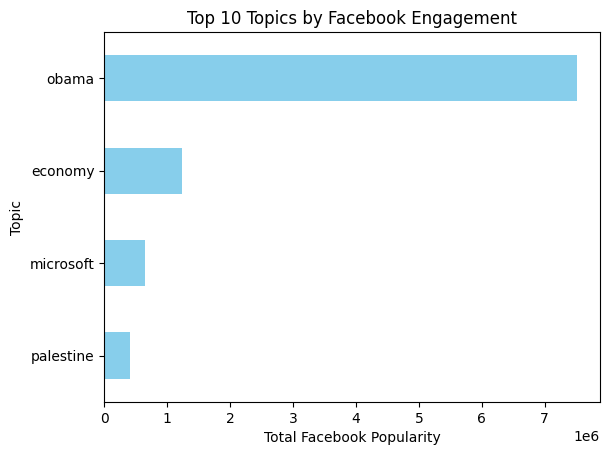

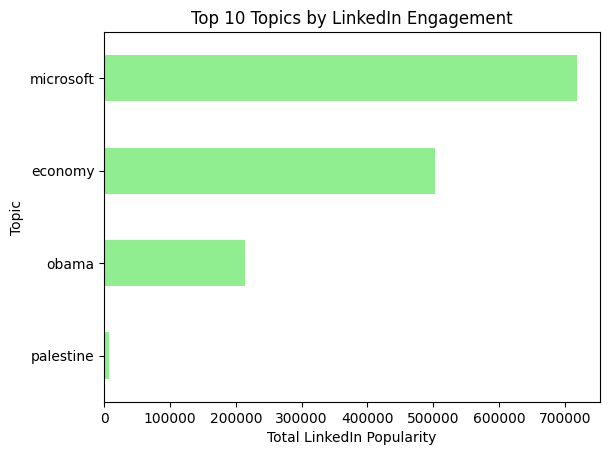

In [ ]:
import matplotlib.pyplot as plt

# Plot top 10 Facebook topics
top_topics_facebook = top_topics.sort_values(by='Facebook', ascending=False).head(10)
top_topics_facebook['Facebook'].plot(kind='barh', color='skyblue')
plt.title('Top 10 Topics by Facebook Engagement')
plt.xlabel('Total Facebook Popularity')
plt.ylabel('Topic')
plt.gca().invert_yaxis()
plt.show()

# Plot top 10 LinkedIn topics
top_topics_linkedin = top_topics.sort_values(by='LinkedIn', ascending=False).head(10)
top_topics_linkedin['LinkedIn'].plot(kind='barh', color='lightgreen')
plt.title('Top 10 Topics by LinkedIn Engagement')
plt.xlabel('Total LinkedIn Popularity')
plt.ylabel('Topic')
plt.gca().invert_yaxis()
plt.show()


<h1> Linkedin Engaggment </h1>

This bar chart, titled "Top 10 Topics by LinkedIn Engagement," displays the total LinkedIn popularity (representing engagement like likes, shares, and comments) for the four topics shown: "microsoft," "economy," "obama," and "palestine."

Here's an interpretation:

"Microsoft" Leads in LinkedIn Engagement: In stark contrast to Facebook engagement, "microsoft" is the topic that generates the most popularity on LinkedIn by a significant margin. Its bar extends the furthest, indicating that content related to Microsoft is highly engaging on this professional networking platform, with popularity exceeding 700,000.

"Economy" is Second, but Substantially Lower: "Economy" ranks second in LinkedIn engagement, with its popularity being noticeably lower than "microsoft" but still substantial, around 500,000.

"Obama" and "Palestine" Have Much Lower Engagement:

"Obama," which was dominant on Facebook, shows considerably less engagement on LinkedIn, with popularity around 200,000. This suggests that political figures might have less relevance or engagement on LinkedIn compared to Facebook.
"Palestine" has very minimal engagement on LinkedIn, with its popularity barely registering above zero, similar to its low engagement on Facebook.
Platform-Specific Engagement Patterns: This chart, when compared to the Facebook engagement chart you previously analyzed, highlights a clear difference in which topics resonate more on different social media platforms. While "obama" was king on Facebook, "microsoft" takes the lead on LinkedIn, likely due to the professional nature of the platform.

In summary, "microsoft" is the most engaging topic on LinkedIn, followed by "economy," while "obama" and "palestine" generate significantly less popularity on this platform.

<h1> Facebook Engaggment </h1>


This bar chart, titled "Top 10 Topics by Facebook Engagement," illustrates the total Facebook popularity (likely representing engagement like likes, shares, comments) for the four topics shown: "obama," "economy," "microsoft," and "palestine."

Here's an interpretation:

"Obama" is the Dominant Topic for Engagement: By a significant margin, "obama" generates the most Facebook engagement. Its bar extends far beyond any other topic, indicating that content related to Obama is highly popular and shared on the platform within this dataset. The total popularity is approximately 7.3 million.

Significant Drop-off to Other Topics: There's a steep decline in engagement from "obama" to the next most popular topic, "economy." This suggests that while "economy" is the second most engaging, its popularity is considerably lower than "obama." "Economy" has approximately 1.2 million in popularity.

Lower Engagement for "Microsoft" and "Palestine": Both "microsoft" and "palestine" show much lower Facebook engagement compared to "obama" and "economy." "Microsoft" has slightly more engagement than "palestine," but both are at the lower end of the spectrum presented. "Microsoft" is around 0.6 million, and "Palestine" is less than 0.2 million.

Implied Ranking: Based on this chart, among the four topics shown, the ranking by Facebook engagement from highest to lowest is: "obama," "economy," "microsoft," and "palestine."

In summary, the chart clearly highlights "obama" as a topic that drives extremely high Facebook engagement compared to the other topics included in this visualization.

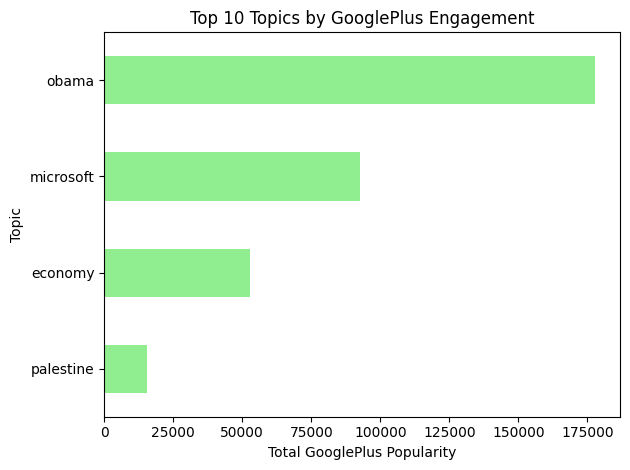

In [ ]:
import matplotlib.pyplot as plt

# Group by Topic and sum GooglePlus popularity
googleplus_by_topic = df_clean.groupby('Topic')['GooglePlus'].sum()

# Sort descending and select top 10
top_topics_googleplus = googleplus_by_topic.sort_values(ascending=False).head(10)

# Plot horizontal bar chart
top_topics_googleplus.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Topics by GooglePlus Engagement')
plt.xlabel('Total GooglePlus Popularity')
plt.ylabel('Topic')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


This bar chart, titled "Top 10 Topics by GooglePlus Engagement," illustrates the total GooglePlus popularity (representing engagement) for the four topics shown: "obama," "microsoft," "economy," and "palestine."

Here's an interpretation:

"Obama" Leads GooglePlus Engagement: Similar to Facebook, "obama" is the most engaging topic on GooglePlus, with its bar extending the furthest. This indicates that content related to Obama garnered the highest popularity on this platform, approximately 175,000.

"Microsoft" is Second: "Microsoft" ranks second in GooglePlus engagement, though its popularity (around 95,000) is considerably less than "obama."

"Economy" and "Palestine" Show Lower Engagement:

"Economy" comes in third, with popularity around 50,000, which is a noticeable drop from "microsoft."
"Palestine" has the lowest engagement among the displayed topics, with popularity around 15,000, indicating very little interaction on GooglePlus.
Overall Lower Scale of Engagement: It's important to note the scale of "Total GooglePlus Popularity" on the x-axis. The highest engagement for "obama" here (around 175,000) is significantly lower than the highest engagement seen on Facebook (over 7 million for "obama") or even LinkedIn (over 700,000 for "microsoft"). This suggests that, in this dataset, GooglePlus might have a lower overall volume of engagement compared to Facebook and LinkedIn for these topics.

In summary, "obama" is the most popular topic on GooglePlus, followed by "microsoft" and "economy," with "palestine" showing the least engagement. The overall engagement levels on GooglePlus appear to be lower than on Facebook or LinkedIn for these specific topics

obama" is the most popular topic on GooglePlus, followed by "microsoft" and "economy," with "palestine" showing the least engagement. The overall engagement levels on GooglePlus appear to be lower than on Facebook or LinkedIn for these specific topics.

obama" as a topic that drives extremely high Facebook engagement compared to the other topics included in this visualization.
microsoft" is the most engaging topic on LinkedIn, followed by "economy," while "obama" and "palestine" generate significantly less popularity on this platform.

The frequency and type of topics discussed significantly differ between Platforms.

2.	What is the overall sentiment (positive, negative, or neutral)? Around trending topics or events?

In [ ]:
top_topics = df_clean['Topic'].value_counts().head(5).index
trending_df = df_clean[df_clean['Topic'].isin(top_topics)]
overall_sentiment = trending_df['SentimentLabel'].value_counts()
print(overall_sentiment)


SentimentLabel
Negative    36673
Neutral     26328
Positive    23484
Name: count, dtype: int64


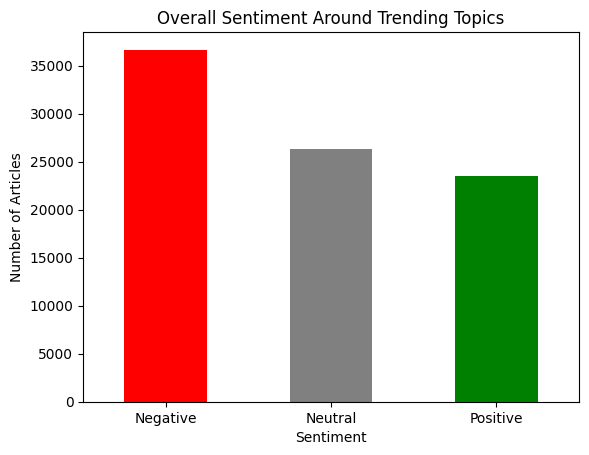

In [ ]:
import matplotlib.pyplot as plt
overall_sentiment.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Overall Sentiment Around Trending Topics')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()



This bar chart, titled "Overall Sentiment Around Trending Topics," displays the distribution of sentiment (Negative, Neutral, Positive) across the articles in the dataset, aggregated for all trending topics.

Here's an interpretation:

Dominance of Negative Sentiment: The chart clearly shows that negative sentiment is the most prevalent, with the highest number of articles (approximately 36,000 to 37,000). This indicates that a significant majority of news or discussions around trending topics in this dataset tend to carry a negative tone.

Neutral Sentiment is Second: Neutral sentiment comes in second, with a considerably lower number of articles than negative sentiment (approximately 26,000 articles).

Positive Sentiment is the Least Common: Positive sentiment has the lowest representation, with around 23,000 to 24,000 articles. This suggests that articles expressing positive views or news are the least common among the trending topics analyzed.

In summary, the overall sentiment across these trending topics is predominantly negative, followed by neutral, and then positive, indicating a generally pessimistic or critical tone in the sampled articles.

the overall sentiment across these trending topics is predominantly negative, followed by neutral, and then positive, indicating a generally pessimistic or critical tone in the sampled articles.

In [ ]:
#using heatmap

C:\Users\amitd\AppData\Local\Temp\ipykernel_30324\3816758096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['SentimentLabel'] = df_clean['SentimentMapped'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})


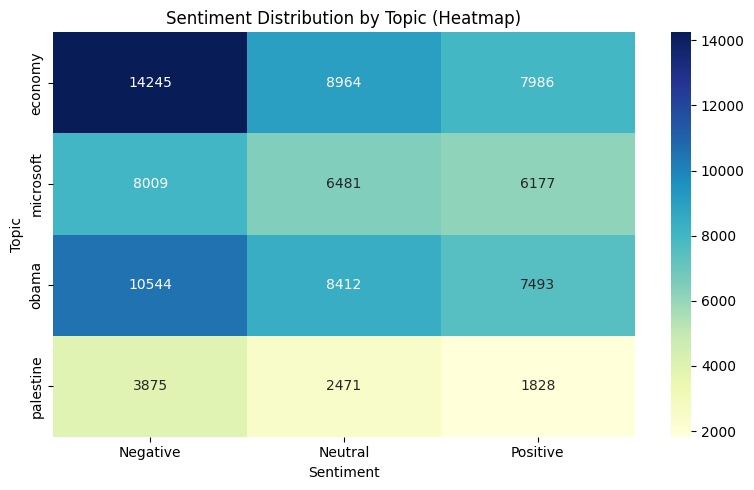

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Map sentiment values to labels
df_clean['SentimentLabel'] = df_clean['SentimentMapped'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})


# Get top 5 trending topics
top_topics = df_clean['Topic'].value_counts().head(5).index

# Filter data
trend_df = df_clean[df_clean['Topic'].isin(top_topics)]

# Pivot table: count of articles per sentiment per topic
heatmap_data = trend_df.pivot_table(index='Topic', 
                                     columns='SentimentLabel', 
                                     values='IDLink',  # You can use any column; 'IDLink' just counts rows
                                     aggfunc='count',
                                     fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d')

plt.title('Sentiment Distribution by Topic (Heatmap)')
plt.ylabel('Topic')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()


The heatmap reveals a general tendency for negative sentiment across most topics in this dataset, with "economy" having the most negative headlines and "Palestine" showing a strong lean towards negative sentiment despite a lower overall volume of news. "Microsoft" and "Obama" also have more negative headlines but show a slightly more balanced distribution between neutral and positive compared to "economy."

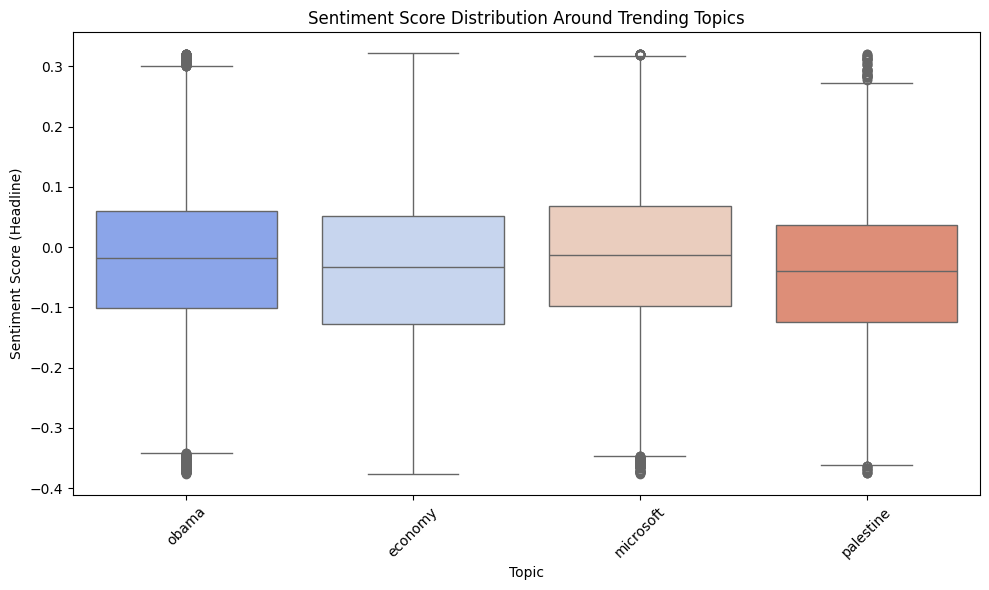

In [ ]:
#Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clean already has these columns:
# 'Topic' and 'SentimentHeadline'

# Step 1: Get top 5 trending topics by article count
top_topics = df_clean['Topic'].value_counts().head(5).index

# Step 2: Filter data for these top topics
trending_df = df_clean[df_clean['Topic'].isin(top_topics)]

# Step 3: Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=trending_df, x='Topic', y='SentimentHeadline', hue='Topic', palette='coolwarm', legend=False)


plt.title('Sentiment Score Distribution Around Trending Topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score (Headline)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Interpretation


"Obama" and "economy" have a mix of slightly negative to slightly positive sentiment. "Microsoft" leans a bit more negative, while "Palestine" shows the most negative sentiment overall
Palestine" box plot has the largest standard deviation. This is because it has the widest box, showing a larger spread of data around the mean.

3. How does public opinion differ between platforms?
Hypothesis
Null Hypothesis (H₀): Public opinion and sentiment do not differ significantly between Reddit and Twitter.
Alternative Hypothesis (H₁): Public opinion and sentiment differ significantly between Reddit and Twitter due to platform structure and user behavior.


In [ ]:
print(df.columns)


Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn', 'SentimentMapped', 'SentimentLabel'],
      dtype='object')


In [ ]:
print(df['Source'].unique())


['USA TODAY' 'Bloomberg' 'RTT News' ... 'Times of Malta (blog)'
 'Fort Worth Star Telegram (blog)' "L'Humanité"]


In [ ]:
# Melt the dataframe to long format for platforms
df_long = df.melt(
    id_vars=['SentimentLabel', 'Topic'], 
    value_vars=['Facebook', 'GooglePlus', 'LinkedIn'], 
    var_name='Platform', 
    value_name='Popularity'
)

# Filter to keep only rows where Popularity > 0 (optional, if you want only active posts)
df_platforms = df_long[df_long['Popularity'] > 0]


In [ ]:
contingency_table = pd.crosstab(df_platforms['Platform'], df_platforms['SentimentLabel'])
print(contingency_table)


SentimentLabel  Negative  Neutral  Positive
Platform                                   
Facebook           25253    18438     16504
GooglePlus         14404    10403      9504
LinkedIn           14536    10628      9837


In [ ]:
import numpy as np

# Observed frequencies
observed = contingency_table.values

# Row and column totals
row_totals = observed.sum(axis=1).reshape(-1, 1)  # column vector
col_totals = observed.sum(axis=0).reshape(1, -1)  # row vector
total = observed.sum()

# Expected frequencies under H0 (independence)
expected = (row_totals @ col_totals) / total

# Compute chi-square statistic
chi_square_stat = np.sum((observed - expected) ** 2 / expected)

print("Chi-square statistic:", chi_square_stat)


Chi-square statistic: 5.818010954754099


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


Chi-square statistic: 5.818010954754099
p-value: 0.2131578113287803
Degrees of freedom: 4


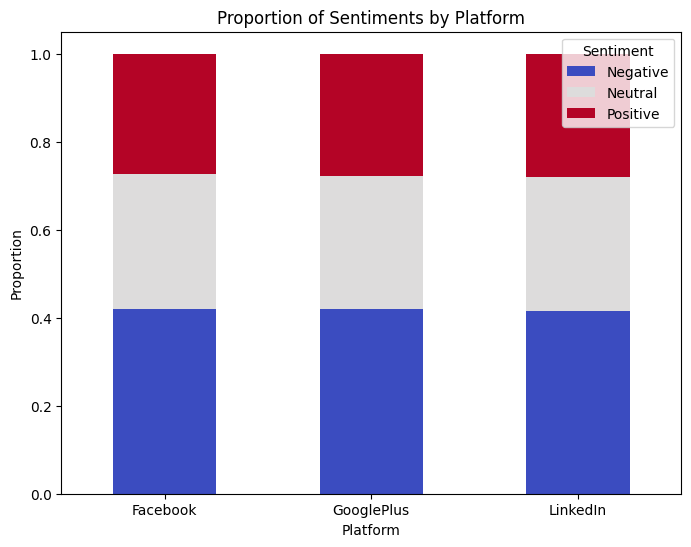

In [ ]:
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)  # Normalize rows to sum to 1
contingency_table_norm.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('Proportion of Sentiments by Platform')
plt.xlabel('Platform')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


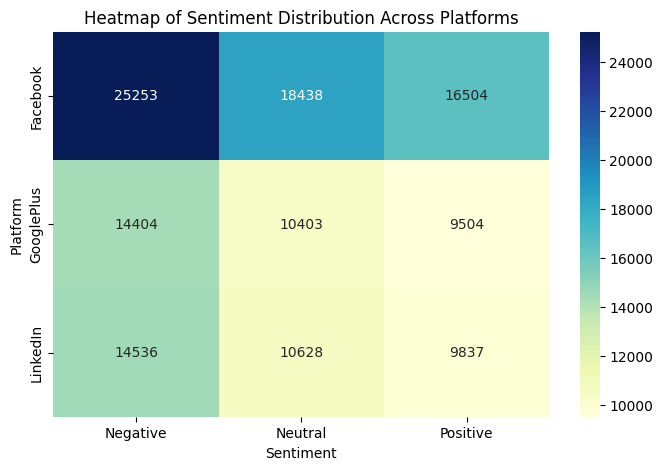

In [ ]:
#heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the contingency table like this:
# contingency_table = pd.crosstab(df_platforms['Source'], df_platforms['SentimentLabel'])

plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Sentiment Distribution Across Platforms')
plt.xlabel('Sentiment')
plt.ylabel('Platform')
plt.show()


In summary:

The heatmap reveals that negative sentiment is the most prevalent across all three platforms. Facebook accounts for the largest share of overall sentiment data, suggesting it's a more active platform for these discussions in this dataset. GooglePlus and LinkedIn exhibit very similar sentiment distributions and overall volumes, both being significantly lower than Facebook. This overall trend points towards a generally negative tone dominating the discussions for the topics analyzed, regardless of the platform

This heatmap, titled "Heatmap of Sentiment Distribution Across Platforms," shows the number of articles or posts (implied by the counts) categorized by their sentiment (Negative, Neutral, Positive) across three different social media platforms: Facebook, GooglePlus, and LinkedIn. The color intensity also helps visualize the counts, with darker blue representing higher numbers and lighter yellow representing lower numbers.

Here's a detailed interpretation:

Overall Dominance of Negative Sentiment: Across all three platforms displayed (Facebook, GooglePlus, and LinkedIn), negative sentiment consistently has the highest number of articles/posts. This suggests a general inclination towards negative discussions or news across these platforms in the dataset.

Facebook Has the Highest Volume of Discussion:

Facebook shows the highest counts for all sentiment categories (Negative: 25,253; Neutral: 18,438; Positive: 16,504).
This indicates that Facebook had the largest volume of relevant content captured in this analysis compared to GooglePlus and LinkedIn.
On Facebook, the sentiment distribution follows a clear pattern: Negative > Neutral > Positive.
GooglePlus and LinkedIn Show Similar Patterns and Volumes:

Both GooglePlus and LinkedIn have considerably lower total volumes of articles/posts compared to Facebook.
Their sentiment distributions are remarkably similar to each other in terms of counts:
GooglePlus: Negative (14,404), Neutral (10,403), Positive (9,504)
LinkedIn: Negative (14,536), Neutral (10,628), Positive (9,837)
Both platforms also follow the same general sentiment pattern: Negative > Neutral > Positive, though with lower absolute numbers than Facebook.